In [1]:
import nltk
from nltk.corpus import twitter_samples
import matplotlib.pyplot as plt
import random

#libraries required for preprocessing
import re                                  # library for regular expression operations
import string                              # for string operations
from nltk.corpus import stopwords          # module for stop words that come with NLTK
from nltk.stem import PorterStemmer        # module for stemming
from nltk.tokenize import TweetTokenizer   # module for tokenizing strings

In [2]:
#download sampletwitter dataset

nltk.download("twitter_samples")

[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\ujjwol\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


True

In [3]:
#select the set of positive and negative tweets

all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

In [4]:
#print a report with the number of positive and negative tweets

print('Number of the positive tweets: ', len(all_positive_tweets))
print('Number of the negative tweets: ', len(all_negative_tweets))

Number of the positive tweets:  5000
Number of the negative tweets:  5000


In [5]:
print('Number of positive tweets: ', type(all_positive_tweets))

print('The type of a tweet entry is: ', type(all_negative_tweets[0]))

Number of positive tweets:  <class 'list'>
The type of a tweet entry is:  <class 'str'>


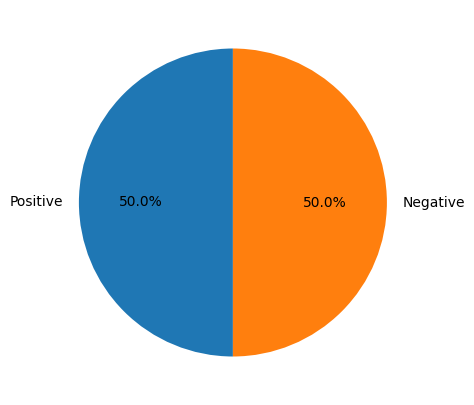

In [6]:
#declare a figure with custom size
fig = plt.figure(figsize=(5,5))

#labels for the two classes
labels = 'Positive', 'Negative'

#size for each slide
sizes = [len(all_positive_tweets), len(all_negative_tweets)]

#pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.axis()
plt.show()

In [7]:
#print one random positive and negative tweet
#color mark  at the beginning to further distinguish the two
#green = positive tweet
#red = negative tweet

print('\033[92m' + all_positive_tweets[random.randint(0, 5000)])

print('\033[91m' + all_negative_tweets[random.randint(0, 5000)])

@MusicMetrop @LostInMuzic @karenak @MosesMo @chrisdrunkpoets thanks for the shout out guys much appreciated :)
@bammyxoxo @stffnkthx @breeyanuh16 same :(


##Preprocess raw text for sentiment analysis

In [8]:
#select random sample

tweet = all_positive_tweets[2277]
print(tweet)

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i


In [9]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ujjwol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
print('\033[92m' +tweet)
print('\033[94m')

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i



In [11]:
#remove hyperlinks, twitter marks and styles

print('\033[92m' + tweet)
print('\033[94m')

# remove old style retweet text "RT"
tweet2 = re.sub(r'^RT[\s]+', '', tweet)

# remove hyperlinks
tweet2 = re.sub(r'https?://[^\s\n\r]+', '', tweet2)

# remove hashtags
# only removing the hash # sign from the word
tweet2 = re.sub(r'#', '', tweet2)

print(tweet2)

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i

My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 


In [12]:

#tokenize the string

print()
print('\033[92m' + tweet2)
print('\033[94m')

# instantiate tokenizer class
tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)

# tokenize tweets
tweet_tokens = tokenizer.tokenize(tweet2)

print()
print('Tokenized string:')
print(tweet_tokens)


My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 


Tokenized string:
['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…']


In [13]:
#Remove stop words and punctuations

#Import the english stop words list from NLTK
stopwords_english = stopwords.words('english') 

# print('Stop words\n')
# print(stopwords_english)

# print('\nPunctuation\n')
# print(string.punctuation)

In [14]:
print('\033[92m')
print(tweet_tokens)
print('\033[94m')

tweets_clean = []

for word in tweet_tokens: # Go through every word in your tokens list
    if (word not in stopwords_english and  # remove stopwords
        word not in string.punctuation):  # remove punctuation
        tweets_clean.append(word)

print('removed stop words and punctuation:')
print(tweets_clean)


['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…']

removed stop words and punctuation:
['beautiful', 'sunflowers', 'sunny', 'friday', 'morning', ':)', 'sunflowers', 'favourites', 'happy', 'friday', '…']


In [15]:
#Stemming

print('\033[92m')
print(tweets_clean)
print('\033[94m')

# Instantiate stemming class
stemmer = PorterStemmer() 

# Create an empty list to store the stems
tweets_stem = [] 

for word in tweets_clean:
    stem_word = stemmer.stem(word)  # stemming word
    tweets_stem.append(stem_word)  # append to the list

print('stemmed words:')
print(tweets_stem)


['beautiful', 'sunflowers', 'sunny', 'friday', 'morning', ':)', 'sunflowers', 'favourites', 'happy', 'friday', '…']

stemmed words:
['beauti', 'sunflow', 'sunni', 'friday', 'morn', ':)', 'sunflow', 'favourit', 'happi', 'friday', '…']


In [16]:
def process_tweet(tweet3):
  
    # Remove URLs
    tweet3 = re.sub(r'http\S+|www\S+|https\S+', '', tweet3, flags=re.MULTILINE)
    # Remove mentions
    tweet3 = re.sub(r'@\w+', '', tweet3)
    # Remove hashtags (only the hash symbol, not the word)
    tweet3 = re.sub(r'#', '', tweet3)
    # Remove non-alphabetic characters and extra spaces
    tweet3 = re.sub(r'[^A-Za-z\s]', '', tweet3)
    tweet3 = tweet3.lower().strip()
    tweet3 = re.sub(r'\s+', ' ', tweet3)
    return tweet3

In [17]:
# choose the same tweet
tweet3 = all_positive_tweets[2277]

print('\033[92m')
print(tweet3)
print('\033[94m')

# call the imported function
tweets_stem3 = process_tweet(tweet3); # Preprocess a given tweet

print('preprocessed tweet:')
print(tweets_stem3) # Print the result


My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i

preprocessed tweet:
my beautiful sunflowers on a sunny friday morning off sunflowers favourites happy friday off
